In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import seaborn as sns
sns.set_context('poster', font_scale=1.25)

In [3]:
sns.set_style('ticks')

In [149]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [150]:
%autoreload 2

In [6]:
import pandas as pd

In [170]:
%lprun -f sample1.sliding_window sample1.sliding_window(sample1.log_data)

In [2]:
import OD_growth_finder as od

In [161]:
experiment = od.OD_growth_experiment('./20160121_subset.xlsx', blank = 0.1, method="smooth_n_slide")

In [162]:
experiment.create_sample_list()

In [163]:
experiment.analyze_sample_data()

In [164]:
growth_data = experiment.output_data()

In [165]:
growth_data

,well,lag time,growth rate,doubling time,time of max growth rate,saturation time,max OD,time of max OD
0,A01,146.645488,0.005430,127.645766,360,544.741903,0.924,880
1,A02,131.519791,0.005414,128.036592,340,529.142799,0.929,900
2,A09,163.931462,0.004879,142.080597,400,595.254134,0.881,900
3,A10,113.808339,0.004863,142.521024,330,536.032453,0.881,830
4,E01,182.381103,0.003371,205.621172,490,741.688324,0.761,890
5,E02,172.926995,0.003321,208.711719,470,733.689785,0.766,840
6,E09,356.713548,0.001234,561.612341,760,899.062782,0.234,900
7,E10,299.910684,0.001398,495.714026,740,898.796538,0.299,900


In [178]:
sample1 = experiment.sample_list[0]

In [184]:
sample1.sat_time

544.74190321102981

In [181]:
sample1.raw_data[sample1.sat_index]

0.84299999999999997

[autoreload of OD_growth_finder failed: Traceback (most recent call last):
  File "/Users/nmcollin/anaconda/lib/python2.7/site-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
NameError: name 'self' is not defined
]


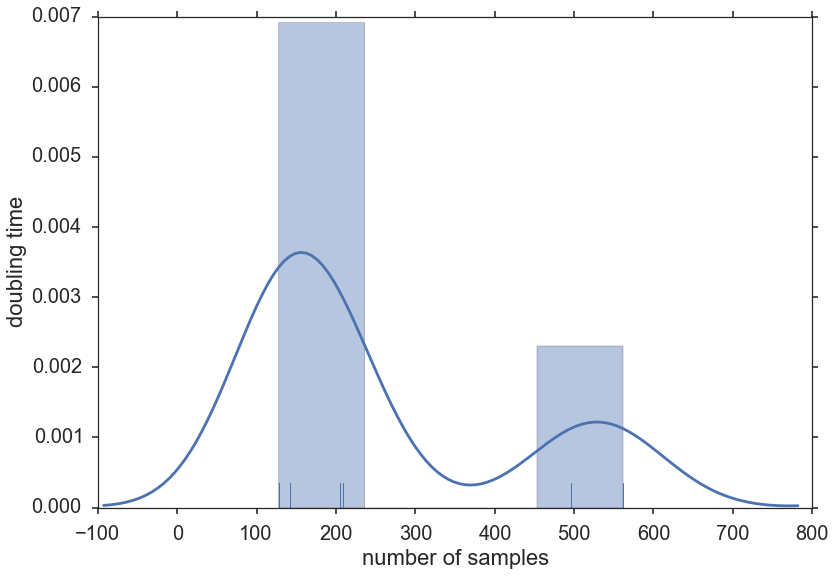

In [175]:
experiment.plot_histogram()

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

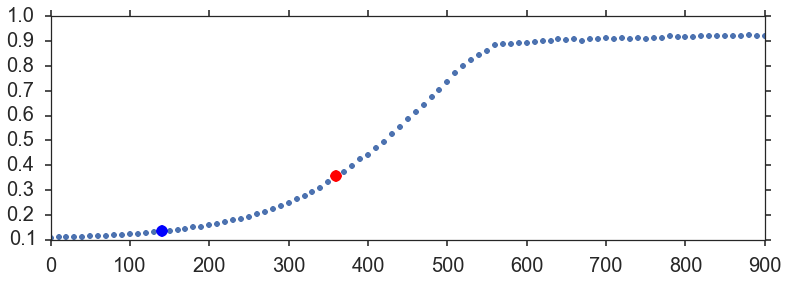

In [185]:
sample1.plot_growth_parameters('./')

In [54]:
#growth_data_filt = growth_data.loc[growth_data['time of max growth rate'] != 0, :]
growth_data_filt = growth_data.loc[growth_data['growth rate'] > 0.001, :]

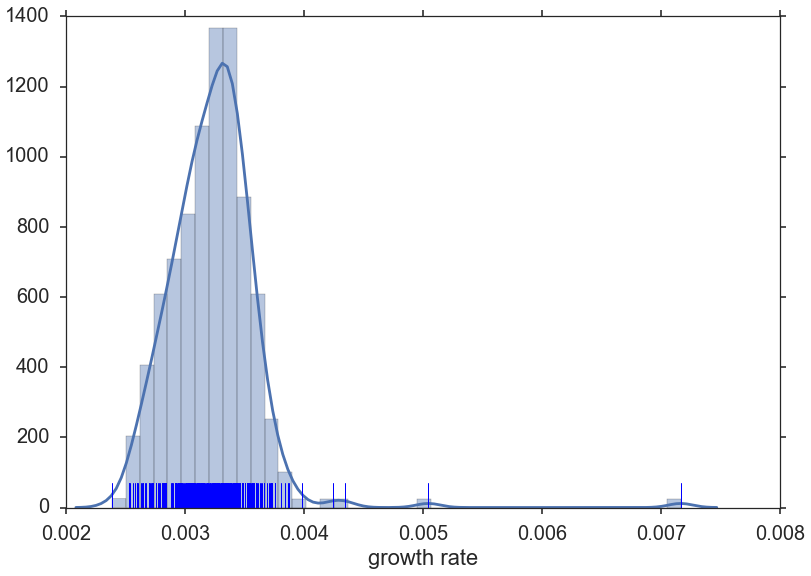

In [55]:
sns.distplot(growth_data_filt['growth rate'])
sns.rugplot(growth_data_filt['growth rate'])

plt.savefig('subset_pic.png', dpi=300, bbox_inches='tight')

In [12]:
growth_data.to_excel('marco_growth_rates.xls')

Let us visualize the data. That would help marco and phoebe.

In [44]:
growth_data['row'] = growth_data['well'].apply(lambda x: ord(x[0]) - 65) # assign row by first character of well name
growth_data['column'] = growth_data['well'].apply(lambda x: int(x[1:])) # assign column by remaining integers

We now create an image of the results.

In [70]:
growth_rate_image = np.zeros((growth_data['row'].max() + 1, growth_data['column'].max() + 1))

In [71]:
growth_rate_image[growth_data['row'], growth_data['column']] = growth_data['growth_rate']

In [84]:
min_growth_rate = np.min(growth_data['growth_rate'])
max_growth_rate = np.max(growth_data['growth_rate'])

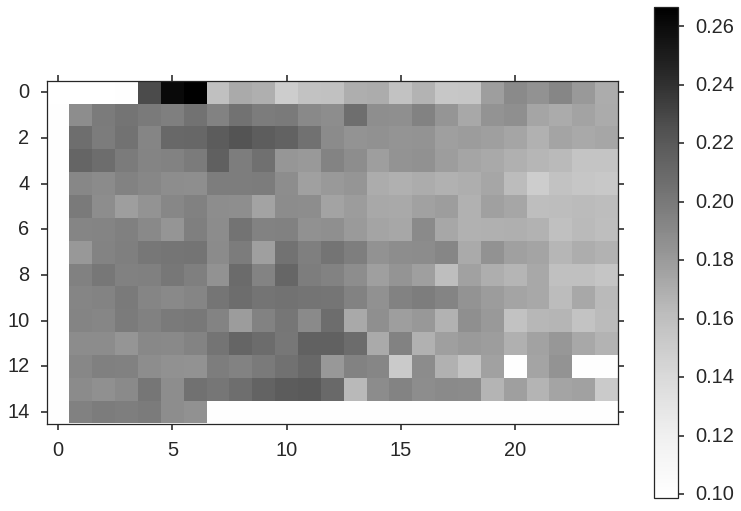

In [91]:
plt.imshow(growth_rate_image, origin='upper', interpolation='None')
plt.colorbar()
plt.clim(min_growth_rate - 0.05, max_growth_rate)

plt.savefig('marco_growth_data.png', dpi=300, bbox_inches='tight')

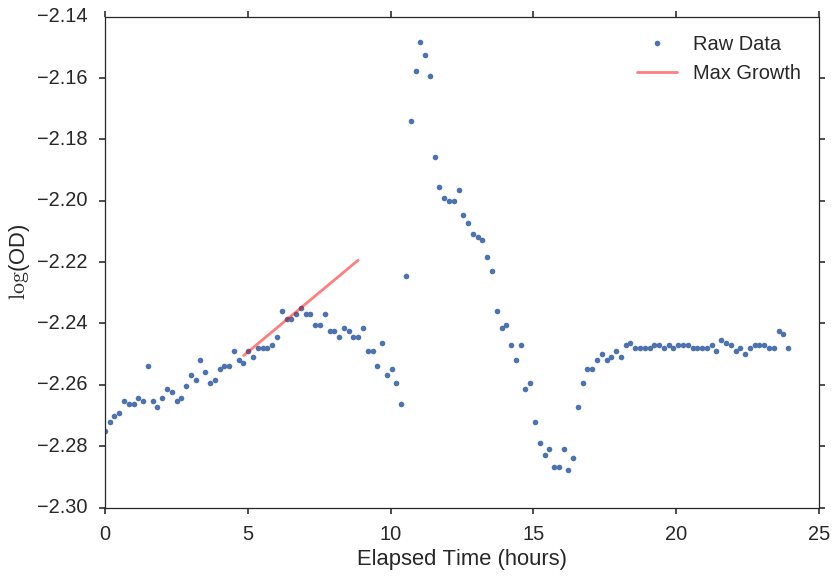

In [15]:
experiment.plot_growth_prediction('O10')

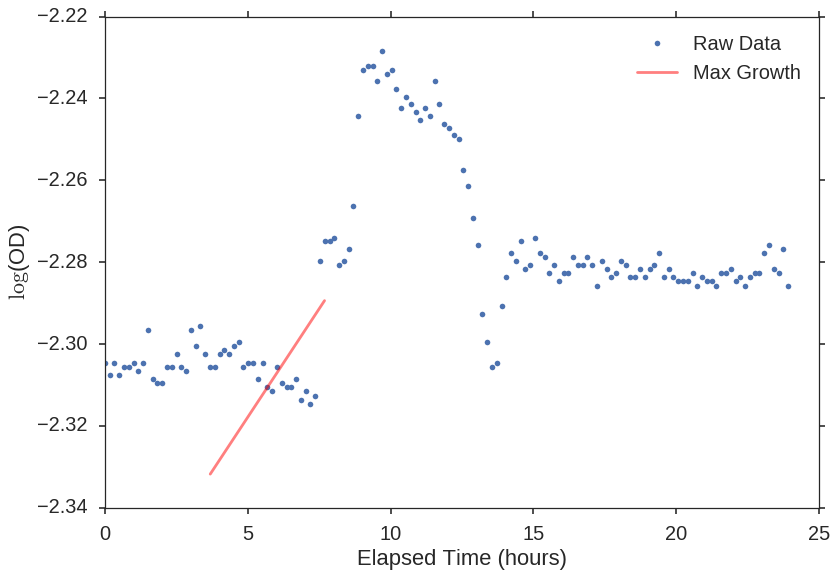

In [48]:
experiment.plot_growth_prediction('O22')